In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import scipy.stats as st

import pandas as pd
import numpy as np
import json
import glob
import os
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('legend',fontsize=24)
plt.rc('axes', labelsize=24) 
if not os.path.exists('figs'): os.mkdir("figs")

In [26]:
model_names = [
               'AE_sound_all', 
               'AE_sound_FiLM_one_hot',
               'AE_sound_FiLM_embed_64',
            ]

In [27]:
def get_results_print(model_name, context="",  n=3):
    if context:
        iter_files = glob.glob("results/{}/{}/results_checkpoint_{}_{}_iter_*.json".format(model_name, context, model_name, context))
    else:
        iter_files = glob.glob("results/{}/results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==n
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["PR-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
#     mean = pd.concat(iters_results_df).groupby(level=0).mean().round(3).astype(str)
#     std = pd.concat(iters_results_df).groupby(level=0).std().round(3).astype(str)
#     return mean+"±"+std
    mean =  pd.concat(iters_results_df).groupby(level=0).mean().round(3)
    se = pd.concat(iters_results_df).groupby(level=0).sem()
    std = pd.concat(iters_results_df).groupby(level=0).std().round(3)
    ci = st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=se)
    print("mean", mean)
    print("std", std)
    print("se", se)
    print('ci', ci)
    ci_upper = ci[0].round(3).astype(str)
    ci_lower = ci[1].round(3).astype(str)
    print(mean.astype(str)+" ("+ci_upper+"-"+ci_lower+")")

    return mean.astype(str)+"±"+(mean - ci[0]).round(3).astype(str)

def get_results_no_window_print(model_name,  n=3):
    iter_files = glob.glob("results/{}/no_window_results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==n
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["PR-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
#     mean = pd.concat(iters_results_df).groupby(level=0).mean().round(3).astype(str)
#     std = pd.concat(iters_results_df).groupby(level=0).std().round(3).astype(str)
#     return mean+"±"+std
    mean =  pd.concat(iters_results_df).groupby(level=0).mean().round(3)
    se = pd.concat(iters_results_df).groupby(level=0).sem()
    std = pd.concat(iters_results_df).groupby(level=0).std().round(3)
    ci = st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=se)
    print("mean", mean)
    print("std", std)
    print("se", se)
    print('ci', ci)
    ci_upper = ci[0].round(3).astype(str)
    ci_lower = ci[1].round(3).astype(str)
    print(mean.astype(str)+" ("+ci_upper+"-"+ci_lower+")")

    return mean.astype(str)+"±"+(mean - ci[0]).round(3).astype(str)

def get_results_oracle_print(model_name,  n=3):
    iter_files = glob.glob("results/{}/oracle_results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==n
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["PR-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
#     mean = pd.concat(iters_results_df).groupby(level=0).mean().round(3).astype(str)
#     std = pd.concat(iters_results_df).groupby(level=0).std().round(3).astype(str)
#     return mean+"±"+std
    mean =  pd.concat(iters_results_df).groupby(level=0).mean().round(3)
    se = pd.concat(iters_results_df).groupby(level=0).sem()
    std = pd.concat(iters_results_df).groupby(level=0).std().round(3)
    ci = st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=se)
    print("mean", mean)
    print("std", std)
    print("se", se)
    print('ci', ci)
    ci_upper = ci[0].round(3).astype(str)
    ci_lower = ci[1].round(3).astype(str)
    print(mean.astype(str)+" ("+ci_upper+"-"+ci_lower+")")

    return mean.astype(str)+"±"+(mean - ci[0]).round(3).astype(str)

results_list_print = []
for model_name in model_names:
    print(model_name)
    results_list_print.append(get_results_print(model_name))

results_list_print.append(get_results_no_window_print("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_no_window"}))
results_df_print = pd.concat(results_list_print, axis=1)
results_df_print

AE_sound_all
mean                   AE_sound_all
fan_0_0dB                0.521
fan_0_6dB                0.644
fan_0_min6dB             0.518
fan_1_0dB                0.670
fan_1_6dB                0.913
fan_1_min6dB             0.485
fan_2_0dB                0.614
fan_2_6dB                0.847
fan_2_min6dB             0.431
fan_3_0dB                0.704
fan_3_6dB                0.913
fan_3_min6dB             0.464
pump_4_0dB               0.273
pump_4_6dB               0.295
pump_4_min6dB            0.305
pump_5_0dB               0.266
pump_5_6dB               0.280
pump_5_min6dB            0.239
pump_6_0dB               0.482
pump_6_6dB               0.610
pump_6_min6dB            0.414
pump_7_0dB               0.161
pump_7_6dB               0.153
pump_7_min6dB            0.176
slider_10_0dB            0.706
slider_10_6dB            0.778
slider_10_min6dB         0.568
slider_11_0dB            0.334
slider_11_6dB            0.519
slider_11_min6dB         0.269
slider_8_0dB         

,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window
fan_0_0dB,0.521±0.051,0.523±0.057,0.541±0.037,0.552±0.037
fan_0_6dB,0.644±0.047,0.719±0.083,0.733±0.027,0.745±0.027
fan_0_min6dB,0.518±0.036,0.51±0.035,0.519±0.026,0.518±0.023
fan_1_0dB,0.67±0.135,0.848±0.024,0.856±0.015,0.814±0.064
fan_1_6dB,0.913±0.03,0.947±0.038,0.935±0.033,0.939±0.022
fan_1_min6dB,0.485±0.026,0.622±0.031,0.628±0.034,0.542±0.023
fan_2_0dB,0.614±0.014,0.663±0.017,0.662±0.061,0.677±0.036
fan_2_6dB,0.847±0.034,0.858±0.028,0.846±0.034,0.89±0.01
fan_2_min6dB,0.431±0.011,0.445±0.014,0.457±0.034,0.461±0.023
fan_3_0dB,0.704±0.196,0.892±0.03,0.949±0.078,0.825±0.019


In [28]:
single_model_list_print = []
for i in range(16):
    single_model_list_print.append(get_results_print("AE_sound", context=str(i)))

single_model_results_print = pd.concat(single_model_list_print)
cande_oracle_results_print = get_results_oracle_print("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_oracle"})
oracle_results_df = pd.concat([single_model_results_print, cande_oracle_results_print], axis=1)
oracle_results_df 

mean               AE_sound
fan_0_0dB        0.564
fan_0_6dB        0.783
fan_0_min6dB     0.540
std               AE_sound
fan_0_0dB        0.011
fan_0_6dB        0.005
fan_0_min6dB     0.005
se               AE_sound
fan_0_0dB     0.006396
fan_0_6dB     0.002955
fan_0_min6dB  0.002707
ci (array([[0.53648178],
       [0.77028772],
       [0.52835447]]), array([[0.59151822],
       [0.79571228],
       [0.55164553]]))
                         AE_sound
fan_0_0dB     0.564 (0.536-0.592)
fan_0_6dB      0.783 (0.77-0.796)
fan_0_min6dB   0.54 (0.528-0.552)
mean               AE_sound
fan_1_0dB        0.816
fan_1_6dB        0.963
fan_1_min6dB     0.593
std               AE_sound
fan_1_0dB        0.045
fan_1_6dB        0.005
fan_1_min6dB     0.005
se               AE_sound
fan_1_0dB     0.026246
fan_1_6dB     0.002631
fan_1_min6dB  0.002963
ci (array([[0.70307304],
       [0.95167958],
       [0.58025157]]), array([[0.92892696],
       [0.97432042],
       [0.60574843]]))
                    

,AE_sound,AE_sound_FiLM_embed_64_oracle
fan_0_0dB,0.564±0.028,0.548±0.038
fan_0_6dB,0.783±0.013,0.741±0.029
fan_0_min6dB,0.54±0.012,0.518±0.028
fan_1_0dB,0.816±0.113,0.869±0.014
fan_1_6dB,0.963±0.011,0.941±0.03
fan_1_min6dB,0.593±0.013,0.631±0.037
fan_2_0dB,0.682±0.018,0.67±0.063
fan_2_6dB,0.912±0.007,0.89±0.028
fan_2_min6dB,0.462±0.007,0.458±0.034
fan_3_0dB,0.963±0.007,0.983±0.031


In [29]:
def get_results(model_name, context=""):
    if context:
        iter_files = glob.glob("results/{}/{}/results_checkpoint_{}_{}_iter_*.json".format(model_name, context, model_name, context))
    else:
        iter_files = glob.glob("results/{}/results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==3
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["PR-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
    return pd.concat(iters_results_df).groupby(level=0).mean()
def get_results_no_window(model_name):

    iter_files = glob.glob("results/{}/no_window_results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==3
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["PR-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
    return pd.concat(iters_results_df).groupby(level=0).mean()

def get_results_oracle(model_name):

    iter_files = glob.glob("results/{}/oracle_results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==3
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["PR-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
    return pd.concat(iters_results_df).groupby(level=0).mean()

results_list = []
for model_name in model_names:
    results_list.append(get_results(model_name))
results_list.append(get_results_no_window("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_no_window"}))
results_df = pd.concat(results_list, axis=1)
results_df

,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window
fan_0_0dB,0.521202,0.523298,0.541235,0.551992
fan_0_6dB,0.644092,0.718783,0.732986,0.744605
fan_0_min6dB,0.517800,0.509575,0.518713,0.517605
fan_1_0dB,0.669976,0.848042,0.855876,0.813878
fan_1_6dB,0.913277,0.947119,0.934815,0.938511
fan_1_min6dB,0.484591,0.621519,0.627942,0.542112
fan_2_0dB,0.614448,0.663144,0.661559,0.676857
fan_2_6dB,0.846696,0.857841,0.846472,0.890408
fan_2_min6dB,0.431164,0.444574,0.457461,0.460993
fan_3_0dB,0.703757,0.892197,0.949474,0.825166


In [30]:
with open("machine_ids_map", "r") as f:
    machine_id_map = json.load(f)
inv_machine_id_map = {v: k for k, v in machine_id_map.items()}

single_model_list = []
for i in range(16):
    single_model_list.append(get_results("AE_sound", context=str(i)))

single_model_results = pd.concat(single_model_list)
cande_oracle_results = get_results_oracle("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_oracle"})
oracle_results_df = pd.concat([single_model_results, cande_oracle_results, results_df.AE_sound_FiLM_embed_64], axis=1)
oracle_results_df[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in oracle_results_df.index.tolist()], index=oracle_results_df.index)
oracle_results_df["ID"] = pd.to_numeric(oracle_results_df["id"])
oracle_results_df["ID"] = oracle_results_df["ID"].map(inv_machine_id_map)
oracle_results_df["ID"] = pd.DataFrame([x.split('_')[-1] for x in oracle_results_df["ID"].tolist()], index=oracle_results_df.index)
oracle_results_df
oracle_results_df 

,AE_sound,AE_sound_FiLM_embed_64_oracle,AE_sound_FiLM_embed_64,Machine Name,id,SNR,ID
fan_0_0dB,0.563611,0.547857,0.541235,fan,0,0dB,00
fan_0_6dB,0.782511,0.740873,0.732986,fan,0,6dB,00
fan_0_min6dB,0.540336,0.518406,0.518713,fan,0,min6dB,00
fan_1_0dB,0.815896,0.868575,0.855876,fan,1,0dB,02
fan_1_6dB,0.962612,0.941365,0.934815,fan,1,6dB,02
fan_1_min6dB,0.593092,0.631414,0.627942,fan,1,min6dB,02
fan_2_0dB,0.681993,0.669552,0.661559,fan,2,0dB,04
fan_2_6dB,0.912412,0.889545,0.846472,fan,2,6dB,04
fan_2_min6dB,0.461719,0.457800,0.457461,fan,2,min6dB,04
fan_3_0dB,0.963147,0.982688,0.949474,fan,3,0dB,06


In [31]:
rank_results_df = results_df.rank(1, ascending=False, method='first')
mean_rank_row = rank_results_df.mean().to_frame().T
mean_rank_row = mean_rank_row.rename(index={0: 'average rank'})
results_and_ranks_df = pd.concat([results_df, mean_rank_row])
results_and_ranks_df

,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window
fan_0_0dB,0.521202,0.523298,0.541235,0.551992
fan_0_6dB,0.644092,0.718783,0.732986,0.744605
fan_0_min6dB,0.517800,0.509575,0.518713,0.517605
fan_1_0dB,0.669976,0.848042,0.855876,0.813878
fan_1_6dB,0.913277,0.947119,0.934815,0.938511
fan_1_min6dB,0.484591,0.621519,0.627942,0.542112
fan_2_0dB,0.614448,0.663144,0.661559,0.676857
fan_2_6dB,0.846696,0.857841,0.846472,0.890408
fan_2_min6dB,0.431164,0.444574,0.457461,0.460993
fan_3_0dB,0.703757,0.892197,0.949474,0.825166


In [32]:
mean_rank_row

,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window
average rank,3.354167,2.291667,2.145833,2.208333


In [33]:
print(st.wilcoxon(oracle_results_df.AE_sound, results_df.AE_sound_FiLM_embed_64))

WilcoxonResult(statistic=585.0, pvalue=0.9754532564136702)


In [34]:
print(st.wilcoxon(oracle_results_df.AE_sound_FiLM_embed_64_oracle, results_df.AE_sound_FiLM_embed_64))

WilcoxonResult(statistic=307.0, pvalue=0.006535800604897193)


In [35]:
with open("machine_ids_map", "r") as f:
    machine_id_map = json.load(f)
inv_machine_id_map = {v: k for k, v in machine_id_map.items()}
results_df[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in results_and_ranks_df.index.tolist()], index=results_and_ranks_df.index)
results_df["ID"] = pd.to_numeric(results_df["id"])
results_df["ID"] = results_df["ID"].map(inv_machine_id_map)
results_df["ID"] = pd.DataFrame([x.split('_')[-1] for x in results_df["ID"].tolist()], index=results_df.index)
results_df

,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window,Machine Name,id,SNR,ID
fan_0_0dB,0.521202,0.523298,0.541235,0.551992,fan,0,0dB,00
fan_0_6dB,0.644092,0.718783,0.732986,0.744605,fan,0,6dB,00
fan_0_min6dB,0.517800,0.509575,0.518713,0.517605,fan,0,min6dB,00
fan_1_0dB,0.669976,0.848042,0.855876,0.813878,fan,1,0dB,02
fan_1_6dB,0.913277,0.947119,0.934815,0.938511,fan,1,6dB,02
fan_1_min6dB,0.484591,0.621519,0.627942,0.542112,fan,1,min6dB,02
fan_2_0dB,0.614448,0.663144,0.661559,0.676857,fan,2,0dB,04
fan_2_6dB,0.846696,0.857841,0.846472,0.890408,fan,2,6dB,04
fan_2_min6dB,0.431164,0.444574,0.457461,0.460993,fan,2,min6dB,04
fan_3_0dB,0.703757,0.892197,0.949474,0.825166,fan,3,0dB,06


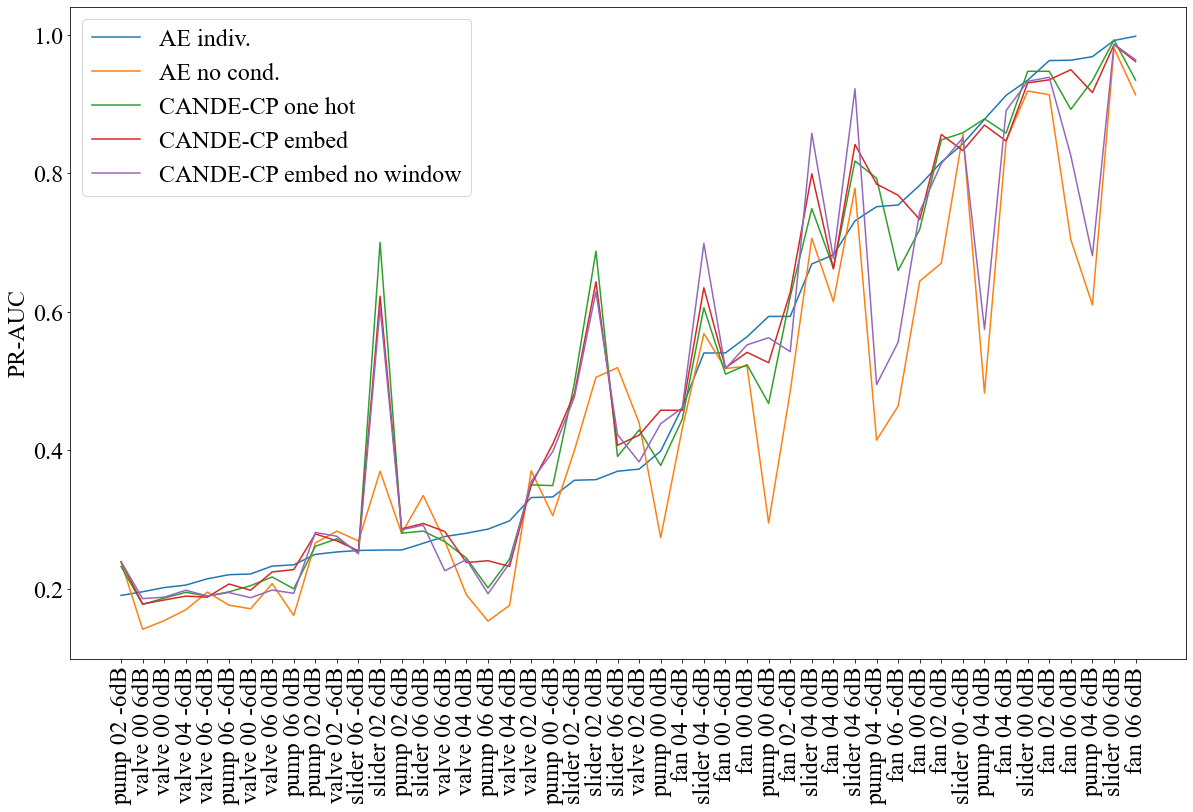

In [40]:
formatted_col_map_plot= {
            "AE_sound": "AE indiv.", 
           "AE_sound_all": "AE no cond.", 
           "AE_sound_FiLM_one_hot"  :"CANDE-CP one hot",  
           "AE_sound_FiLM_embed_64": "CANDE-CP embed",
           "AE_sound_FiLM_embed_64_no_window": "CANDE-CP embed no window"
}

cols_to_plot = ["AE indiv.", "AE no cond.","CANDE-CP one hot","CANDE-CP embed","CANDE-CP embed no window"]
plt_results = pd.concat([results_df,single_model_results], axis=1).sort_values(by="AE_sound")
plt_results = plt_results.rename(columns=formatted_col_map_plot, errors="raise")
plt_results[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in plt_results.index.tolist()], index=plt_results.index)
plt_results_labels = plt_results["Machine Name"]+' '+plt_results["ID"].astype(str)+" "+plt_results["SNR"]
plt_results_labels = [s.replace('min', '-') for s in plt_results_labels ]
plt_results_ax = plt_results[cols_to_plot].plot(figsize=(20, 12))
plt_results_ax.set_xticks(np.arange(len(plt_results)))
plt_results_ax.set_ylabel("PR-AUC")
plt_results_ax.tick_params(axis='both', which='major', labelsize=24)
plt_results_ax.set_xticklabels(plt_results_labels, rotation=90)
plt.savefig("figs/CANDE-CP-MIMII-PR-AUC.png")



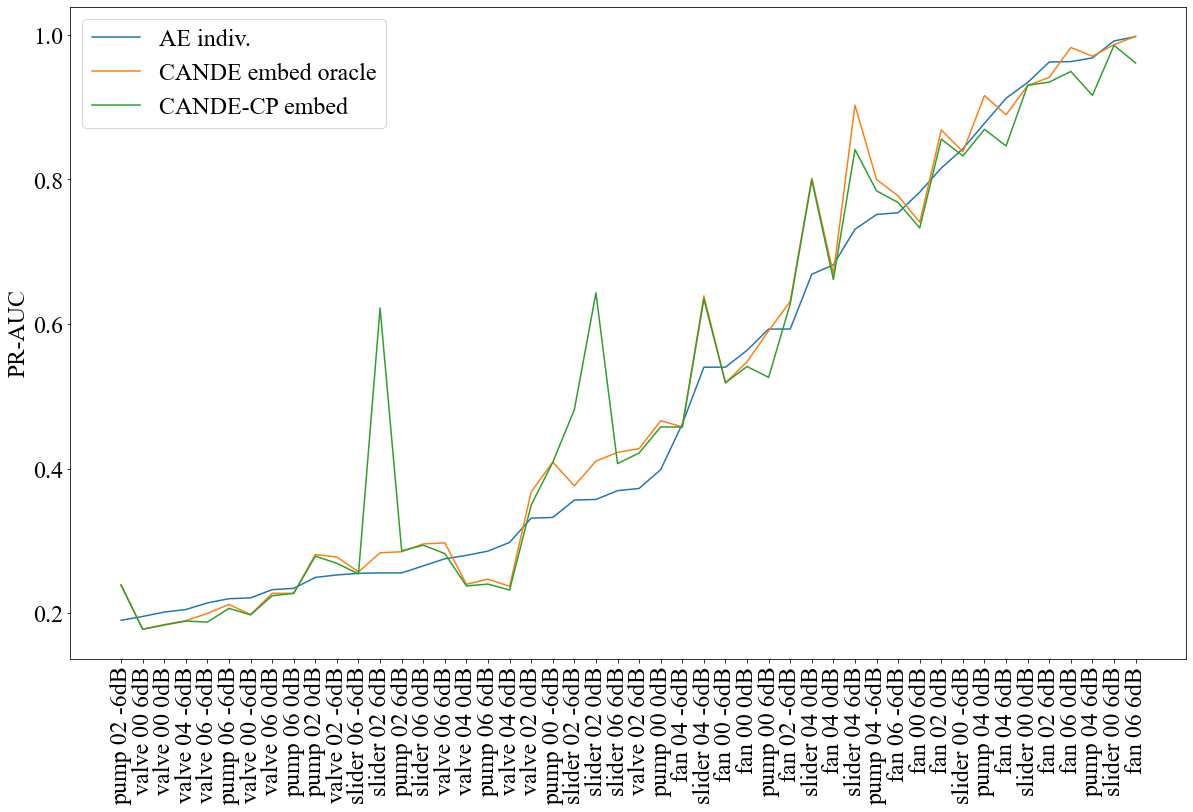

In [41]:
formatted_col_map_oracle_plot= {
           "AE_sound": "AE indiv.", 
           "AE_sound_FiLM_embed_64_oracle": "CANDE embed oracle",
           "AE_sound_FiLM_embed_64": "CANDE-CP embed",
}

cols_to_plot_oracle = ["AE indiv.", "CANDE embed oracle","CANDE-CP embed"]
plt_oracle_results_df = oracle_results_df.sort_values(by="AE_sound")
plt_oracle_results_df  = plt_oracle_results_df.rename(columns=formatted_col_map_oracle_plot, errors="raise")
plt_oracle_results_df [["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in plt_oracle_results_df.index.tolist()], index=plt_oracle_results_df.index)
plt_oracle_results_labels = plt_oracle_results_df["Machine Name"]+' '+plt_oracle_results_df["ID"].astype(str)+" "+plt_oracle_results_df["SNR"]
plt_oracle_results_labels = [s.replace('min', '-') for s in plt_oracle_results_labels]
plt_oracle_results_df_ax = plt_oracle_results_df[cols_to_plot_oracle].plot(figsize=(20, 12))
plt_oracle_results_df_ax.set_ylabel("PR-AUC")
plt_oracle_results_df_ax.set_xticks(np.arange(len(plt_oracle_results_df)))
plt_oracle_results_df_ax.tick_params(axis='both', which='major', labelsize=24)
plt_oracle_results_df_ax.set_xticklabels(plt_results_labels, rotation=90)
plt.savefig("figs/CANDE-CP-oracle-MIMII-PR-AUC.png")

In [38]:
formatted_col_map= {
           "AE_sound_all": "AE no cond.", 
           "AE_sound_FiLM_one_hot"  :"CANDE-CP one hot",  
           "AE_sound_FiLM_embed_64": "CANDE-CP embed",
           "AE_sound_FiLM_embed_64_no_window": "CANDE-CP embed no window"
}


results_df_print[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in results_df_print.index.tolist()], index=results_df_print.index)

results_df_print["ID"] = pd.to_numeric(results_df_print["id"])
results_df_print["ID"] = results_df_print["ID"].map(inv_machine_id_map)

results_df_print["ID"] = pd.DataFrame([x.split('_')[-1] for x in results_df_print["ID"].tolist()], index=results_df_print.index)
formatted_results_ranks_df_print= pd.concat([results_df_print, mean_rank_row])
formatted_results_ranks_df_print= formatted_results_ranks_df_print.rename(columns=formatted_col_map, errors="raise")

formatted_results_ranks_df_print = formatted_results_ranks_df_print[[
    "Machine Name",
    "ID",
    "SNR",
    "AE no cond.", 
    "CANDE-CP one hot", 
    'CANDE-CP embed no window',
    "CANDE-CP embed"
]]


In [39]:

print(formatted_results_ranks_df_print.to_latex( columns=formatted_results_ranks_df_print.columns, index=False))

\begin{tabular}{lllllll}
\toprule
Machine Name &   ID &     SNR &  AE no cond. & CANDE-CP one hot & CANDE-CP embed no window & CANDE-CP embed \\
\midrule
         fan &   00 &     0dB &  0.521±0.051 &      0.523±0.057 &              0.552±0.037 &    0.541±0.037 \\
         fan &   00 &     6dB &  0.644±0.047 &      0.719±0.083 &              0.745±0.027 &    0.733±0.027 \\
         fan &   00 &  min6dB &  0.518±0.036 &       0.51±0.035 &              0.518±0.023 &    0.519±0.026 \\
         fan &   02 &     0dB &   0.67±0.135 &      0.848±0.024 &              0.814±0.064 &    0.856±0.015 \\
         fan &   02 &     6dB &   0.913±0.03 &      0.947±0.038 &              0.939±0.022 &    0.935±0.033 \\
         fan &   02 &  min6dB &  0.485±0.026 &      0.622±0.031 &              0.542±0.023 &    0.628±0.034 \\
         fan &   04 &     0dB &  0.614±0.014 &      0.663±0.017 &              0.677±0.036 &    0.662±0.061 \\
         fan &   04 &     6dB &  0.847±0.034 &      0.858±0.028 &    

In [16]:
single_model_list_print = []
for i in range(16):
    single_model_list_print.append(get_results_print("AE_sound", context=str(i)))
single_model_results_print = pd.concat(single_model_list_print)
cande_oracle_results_print = get_results_oracle_print("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_oracle"})
oracle_results_df_print = pd.concat([single_model_results_print, cande_oracle_results_print, results_df_print.AE_sound_FiLM_embed_64], axis=1)


oracle_results_df_print[["Machine Name", "id", "SNR"]] = pd.DataFrame(
    [x.split('_') for x in oracle_results_df_print.index.tolist()], 
    index=oracle_results_df_print.index
)

oracle_results_df_print["ID"] = pd.to_numeric(oracle_results_df_print["id"])
oracle_results_df_print["ID"] = oracle_results_df_print["ID"].map(inv_machine_id_map)

oracle_results_df_print["ID"] = pd.DataFrame(
    [x.split('_')[-1] for x in oracle_results_df_print["ID"].tolist()], 
    index=oracle_results_df_print.index
)


formatted_results_oracle_df_print= oracle_results_df_print.rename(columns=formatted_col_map_oracle_plot, errors="raise")
formatted_results_oracle_df_print

mean               AE_sound
fan_0_0dB        0.564
fan_0_6dB        0.783
fan_0_min6dB     0.540
std               AE_sound
fan_0_0dB        0.011
fan_0_6dB        0.005
fan_0_min6dB     0.005
se               AE_sound
fan_0_0dB     0.006396
fan_0_6dB     0.002955
fan_0_min6dB  0.002707
ci (array([[0.53648178],
       [0.77028772],
       [0.52835447]]), array([[0.59151822],
       [0.79571228],
       [0.55164553]]))
                         AE_sound
fan_0_0dB     0.564 (0.536-0.592)
fan_0_6dB      0.783 (0.77-0.796)
fan_0_min6dB   0.54 (0.528-0.552)
mean               AE_sound
fan_1_0dB        0.816
fan_1_6dB        0.963
fan_1_min6dB     0.593
std               AE_sound
fan_1_0dB        0.045
fan_1_6dB        0.005
fan_1_min6dB     0.005
se               AE_sound
fan_1_0dB     0.026246
fan_1_6dB     0.002631
fan_1_min6dB  0.002963
ci (array([[0.70307304],
       [0.95167958],
       [0.58025157]]), array([[0.92892696],
       [0.97432042],
       [0.60574843]]))
                    

,AE indiv.,CANDE embed oracle,CANDE-CP embed,Machine Name,id,SNR,ID
fan_0_0dB,0.564±0.028,0.548±0.038,0.541±0.037,fan,0,0dB,00
fan_0_6dB,0.783±0.013,0.741±0.029,0.733±0.027,fan,0,6dB,00
fan_0_min6dB,0.54±0.012,0.518±0.028,0.519±0.026,fan,0,min6dB,00
fan_1_0dB,0.816±0.113,0.869±0.014,0.856±0.015,fan,1,0dB,02
fan_1_6dB,0.963±0.011,0.941±0.03,0.935±0.033,fan,1,6dB,02
fan_1_min6dB,0.593±0.013,0.631±0.037,0.628±0.034,fan,1,min6dB,02
fan_2_0dB,0.682±0.018,0.67±0.063,0.662±0.061,fan,2,0dB,04
fan_2_6dB,0.912±0.007,0.89±0.028,0.846±0.034,fan,2,6dB,04
fan_2_min6dB,0.462±0.007,0.458±0.034,0.457±0.034,fan,2,min6dB,04
fan_3_0dB,0.963±0.007,0.983±0.031,0.949±0.078,fan,3,0dB,06


In [17]:
print(formatted_results_oracle_df_print[["Machine Name",  "ID", "SNR", "AE indiv.", "CANDE embed oracle","CANDE-CP embed"]].to_latex(  index=False))

\begin{tabular}{llllll}
\toprule
Machine Name &  ID &     SNR &    AE indiv. & CANDE embed oracle & CANDE-CP embed \\
\midrule
         fan &  00 &     0dB &  0.564±0.028 &        0.548±0.038 &    0.541±0.037 \\
         fan &  00 &     6dB &  0.783±0.013 &        0.741±0.029 &    0.733±0.027 \\
         fan &  00 &  min6dB &   0.54±0.012 &        0.518±0.028 &    0.519±0.026 \\
         fan &  02 &     0dB &  0.816±0.113 &        0.869±0.014 &    0.856±0.015 \\
         fan &  02 &     6dB &  0.963±0.011 &         0.941±0.03 &    0.935±0.033 \\
         fan &  02 &  min6dB &  0.593±0.013 &        0.631±0.037 &    0.628±0.034 \\
         fan &  04 &     0dB &  0.682±0.018 &         0.67±0.063 &    0.662±0.061 \\
         fan &  04 &     6dB &  0.912±0.007 &         0.89±0.028 &    0.846±0.034 \\
         fan &  04 &  min6dB &  0.462±0.007 &        0.458±0.034 &    0.457±0.034 \\
         fan &  06 &     0dB &  0.963±0.007 &        0.983±0.031 &    0.949±0.078 \\
         fan &  06 &   

In [18]:
preds = glob.glob("context_preds/context_preds*")
machine_id_db = ['_'.join(s.split('.')[0].split('_')[4:7]) for s in preds]
gt_sorted = []
preds_sorted = []
preds_raw_sorted = []
for id in machine_id_db:
    gt = np.full(len(np.load("context_preds/context_preds_expo_{}_3.npy".format(id))), int(id.split('_')[1]))
    gt_sorted.append(gt)
    preds_sorted.append(np.load("context_preds/context_preds_expo_{}_3.npy".format(id)))
    preds_raw_sorted.append(np.load("context_preds/raw_context_preds_{}_3.npy".format(id)))
gt_c = np.concatenate(gt_sorted)
preds_c = np.concatenate(preds_sorted)
preds_raw_c = np.concatenate(preds_raw_sorted)
print("window_preds", accuracy_score(gt_c, preds_c))
print("raw preds", accuracy_score(gt_c, preds_raw_c))


window_preds 0.8898689437302555
raw preds 0.7685089612461293


In [19]:
def standard_error(acc, n):
    return np.sqrt(acc*(1-acc)/n)

def ci_95(se):
    return 1.96*se
acc = accuracy_score(gt_c, preds_c)
se = standard_error(acc, len(gt_c))
ci = ci_95(se)

acc_raw = accuracy_score(gt_c, preds_raw_c)
se_raw = standard_error(acc_raw, len(gt_c))
ci_raw = ci_95(se_raw)

print(ci, ci_raw )

0.003431593910730911 0.004623485723633083


In [42]:
accuracy_score(gt_c, preds_raw_c)

0.7685089612461293

In [43]:
supervised_results = pd.DataFrame()
supervised_results['Model'] = ["CANDE-CP windowed pred.", "CANDE-CP no window pred."]
supervised_results['Accuracy'] = [acc, acc_raw]
supervised_results['% Accuracy'] = supervised_results['Accuracy'] *100
supervised_results["ci_one_side"] = [ci, ci_raw]
supervised_results['% Accuracy ± 95/% ci.'] =  supervised_results['% Accuracy'].round(3).astype(str) +' ± '+  supervised_results['ci_one_side'].round(6).astype(str)
supervised_results[['Model', '% Accuracy ± 95/% ci.']]

,Model,% Accuracy ± 95/% ci.
0,CANDE-CP windowed pred.,88.987 ± 0.003432
1,CANDE-CP no window pred.,76.851 ± 0.004623


In [44]:
print(supervised_results[['Model', '% Accuracy ± 95/% ci.']].to_latex(index=False))  

\begin{tabular}{ll}
\toprule
                    Model & \% Accuracy ± 95/\% ci. \\
\midrule
  CANDE-CP windowed pred. &     88.987 ± 0.003432 \\
 CANDE-CP no window pred. &     76.851 ± 0.004623 \\
\bottomrule
\end{tabular}



In [22]:
def plot_ctx(gt, preds, fig_name):
    with open("machine_ids_map", 'r') as json_f:
        machine_ids_map = json.load(json_f)

    machine_ids_map  = dict(machine_ids_map)
    ctx_labels = []
    for i, (k, v) in enumerate(machine_ids_map.items()):
        if v == i:
            ctx_labels.append(' '.join(k.split('_')))
    print(ctx_labels)
    fig, ax= plt.subplots(figsize=(20,15))
    cfx = confusion_matrix(gt, preds)
    sns.heatmap(cfx/np.sum(cfx), cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))
    ax.xaxis.set_ticklabels(ctx_labels) 
    ax.yaxis.set_ticklabels(ctx_labels);
    plt.xticks(fontsize=22, rotation=45)
    plt.yticks(fontsize=22,  rotation=45)
    fig.savefig(fig_name)
inv_machine_id_map = {v: k for k, v in machine_id_map.items()}


['fan 00', 'fan 02', 'fan 04', 'fan 06', 'pump 00', 'pump 02', 'pump 04', 'pump 06', 'slider 00', 'slider 02', 'slider 04', 'slider 06', 'valve 00', 'valve 02', 'valve 04', 'valve 06']


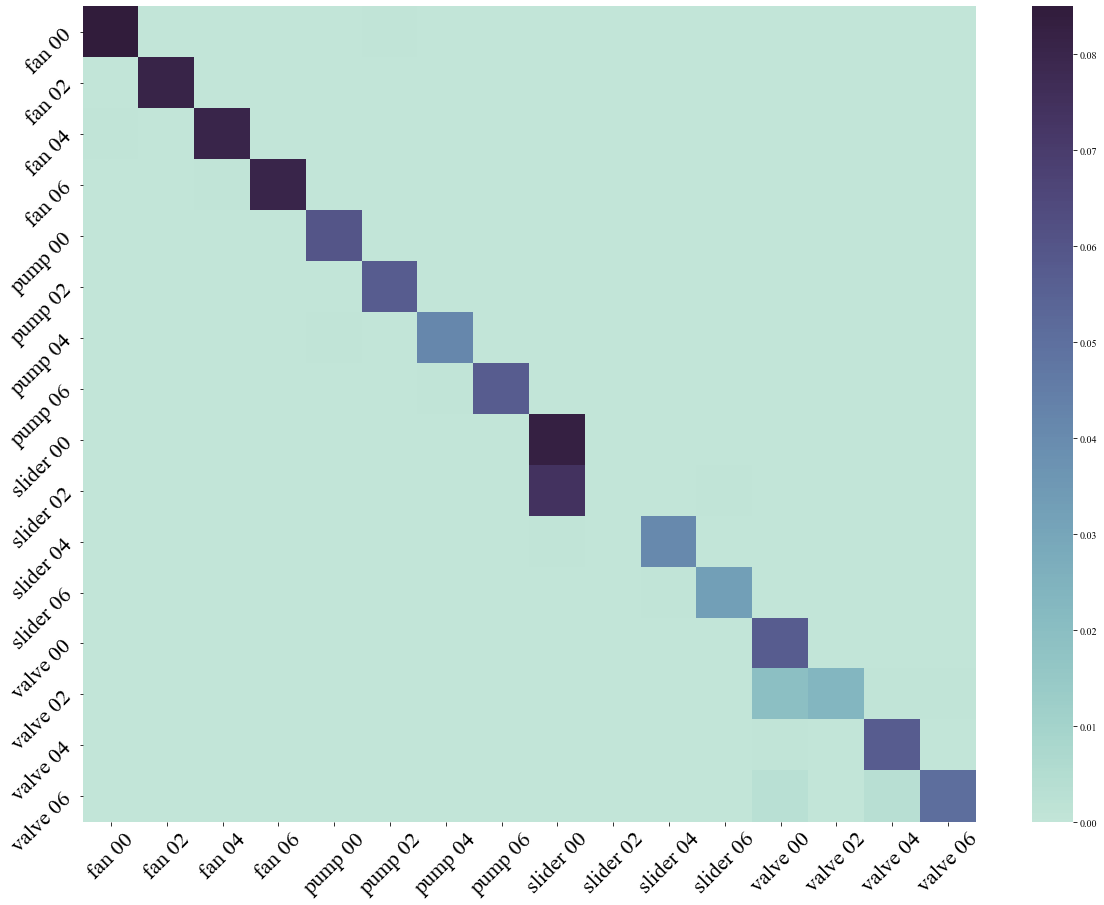

In [23]:
plot_ctx(gt_c, preds_c, "figs/confusion-matrix-CANDE-CP.png")

['fan 00', 'fan 02', 'fan 04', 'fan 06', 'pump 00', 'pump 02', 'pump 04', 'pump 06', 'slider 00', 'slider 02', 'slider 04', 'slider 06', 'valve 00', 'valve 02', 'valve 04', 'valve 06']


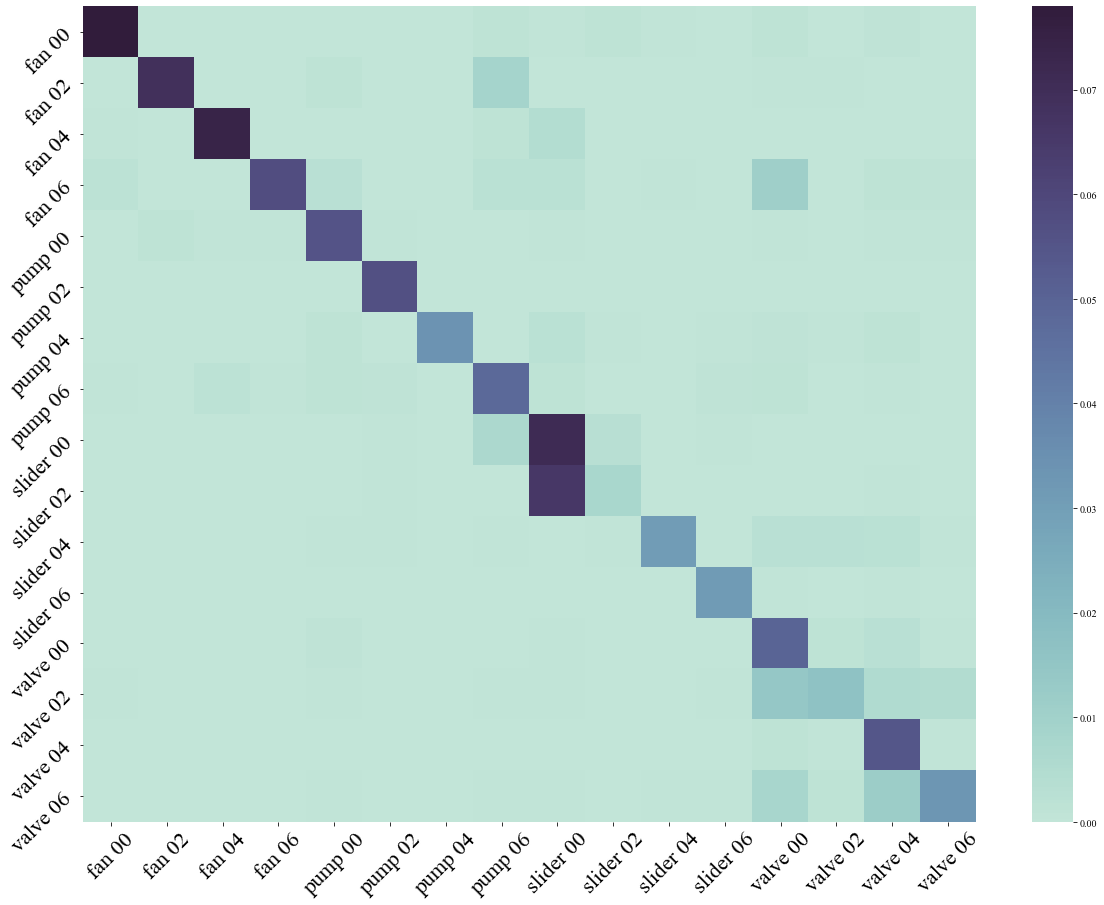

In [24]:
plot_ctx(gt_c, preds_raw_c, "figs/confusion-matrix-CANDE-CP-no-window.png")